<a href="https://colab.research.google.com/github/sethkipsangmutuba/Numerical-Computation/blob/main/Numerical_Computation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Computation

Machine learning algorithms often rely on numerical computation, which involves iteratively updating estimates to solve problems, rather than deriving an exact formula. Common tasks include optimization (minimizing or maximizing a function) and solving linear equations. Even evaluating mathematical functions on computers can be challenging due to the imprecision of real number representations in finite memory.


## 4.1 Overflow and Underflow

A key challenge in digital computation is representing real numbers with finite bit patterns, leading to approximation errors. These errors can compound, causing algorithms to fail if not carefully managed.

Two significant types of numerical errors are underflow and overflow:

- **Underflow** occurs when small numbers are rounded to zero, causing issues like division by zero or taking the logarithm of zero.
- **Overflow** happens when large numbers are approximated as infinity (∞), leading to undefined results.

An example is the **softmax function**, which can experience underflow or overflow if the input values are too large or too small. To prevent this, the input vector can be shifted by subtracting the maximum value, stabilizing the function. Similarly, **log softmax** can be stabilized to avoid numerical issues.

Numerical stability is crucial in machine learning algorithms, and many libraries (like Theano) automatically handle these issues.


In [19]:
import numpy as np

# Function for numerically stable softmax
def stable_softmax(x):
    # Subtract the max value from the input to prevent overflow
    z = x - np.max(x)
    exp_x = np.exp(z)
    return exp_x / np.sum(exp_x)

# Function for numerically stable log softmax
def stable_log_softmax(x):
    softmax_values = stable_softmax(x)
    return np.log(softmax_values)

# Example usage
x = np.array([1000, 1000, 1000])  # Example where overflow could occur

# Compute stable softmax
softmax_result = stable_softmax(x)
print("Numerically stable softmax:", softmax_result)

# Compute stable log softmax
log_softmax_result = stable_log_softmax(x)
print("Numerically stable log softmax:", log_softmax_result)


Numerically stable softmax: [0.33333333 0.33333333 0.33333333]
Numerically stable log softmax: [-1.09861229 -1.09861229 -1.09861229]


### Stable Softmax
The input vector `x` is first adjusted by subtracting the maximum value in `x`. This prevents large numbers from causing overflow when passed to the exponential function.

### Stable Log Softmax
After calculating the stable softmax, the logarithm is applied to the result, ensuring numerical stability and avoiding underflow or overflow.


### 4.2 Poor Conditioning
Conditioning measures how much a function’s output changes with small changes in its input. Functions that change rapidly can be problematic for computation due to rounding errors.

For example, for $f(x) = A^{-1}x$, the condition number of matrix $A \in \mathbb{R}^{n \times n}$ is given by the ratio of the largest and smallest eigenvalues:

$$\text{Condition Number} = \frac{\lambda_{max}}{\lambda_{min}}.$$

A large condition number indicates that matrix inversion is sensitive to input errors. Poorly conditioned matrices amplify errors, both from the input and during the inversion process itself.


In [20]:
import numpy as np

# Example: Create a poorly conditioned matrix A
# A is nearly singular (det(A) close to 0), which makes it poorly conditioned
A = np.array([[1, 2], [2, 4.0001]])

# Compute the condition number of A using numpy's cond function
condition_number = np.linalg.cond(A)

# Try inverting A
try:
    A_inv = np.linalg.inv(A)
    print("Inverse of A:\n", A_inv)
except np.linalg.LinAlgError:
    print("Matrix A is singular and cannot be inverted.")

print("Condition Number of A:", condition_number)


Inverse of A:
 [[ 40001.00000009 -20000.00000005]
 [-20000.00000005  10000.00000002]]
Condition Number of A: 250008.00009210614


### 4.3 Gradient-Based Optimization

Optimization involves minimizing or maximizing a function, often referred to as the **objective function** or **cost function**. Most deep learning algorithms focus on minimizing a function, and this is achieved through iterative processes like **gradient descent**.

- **Gradient Descent**: This method uses the derivative (slope) of the function to find the direction in which the function decreases most rapidly. The gradient points uphill, and the negative gradient points downhill. To minimize the function, we update the variables in the direction opposite to the gradient.

- **Critical Points**: These are points where the derivative is zero. They could be:
  - **Local Minimum**: Lower than neighboring points.
  - **Local Maximum**: Higher than neighboring points.
  - **Saddle Point**: Neither a maximum nor minimum.

- **Global Minimum**: The absolute lowest point of the function, ideally where optimization ends.

For functions with multiple inputs, we use **partial derivatives** to measure how the function changes with respect to each variable, and **gradients** contain all these partial derivatives.

**Optimization Process**:
1. Find the direction of steepest descent using the negative gradient.
2. Update the values using the formula:  
   $$
   x' = x - \eta \nabla_x f(x)
   $$
   where $(\eta)$ is the **learning rate**.
   
In practice, optimization may not find the global minimum due to multiple local minima or plateaus, but a sufficiently low function value is generally acceptable.


Minimum found at x = 7.136238463529802e-05


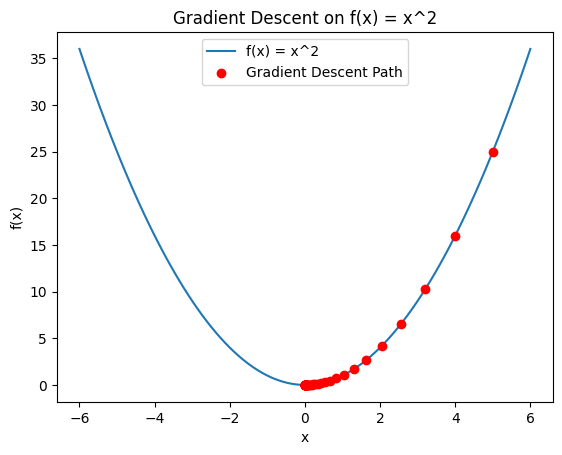

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define the quadratic function f(x) = x^2
def f(x):
    return x**2

# Define the derivative of the function f'(x) = 2x
def df(x):
    return 2*x

# Gradient Descent function
def gradient_descent(learning_rate, initial_guess, num_iterations):
    x = initial_guess
    history = [x]

    for _ in range(num_iterations):
        x = x - learning_rate * df(x)  # Update rule
        history.append(x)

    return x, history

# Parameters
learning_rate = 0.1
initial_guess = 5  # Starting point
num_iterations = 50

# Run gradient descent
min_x, history = gradient_descent(learning_rate, initial_guess, num_iterations)

# Print the result
print(f"Minimum found at x = {min_x}")

# Plotting the function and the descent path
x_vals = np.linspace(-6, 6, 100)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label='f(x) = x^2')
plt.scatter(history, f(np.array(history)), color='red', label='Gradient Descent Path', zorder=5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent on f(x) = x^2')
plt.legend()
plt.show()

### Result Interpretation:

The output `Minimum found at x = 7.136238463529802e-05` indicates that the gradient descent algorithm has converged to a value of $ x $ that is very close to the global minimum of the function $ f(x) = x^2 $. The value $x = 7.136 \times 10^{-5}$ is an approximation of the minimum, and it is extremely close to zero, which is the exact minimum of the function.

### Why This Happens:
- **Gradient Descent**: The gradient descent algorithm works by iteratively adjusting the value of $x$ in the direction that minimizes the function. In this case, the function $ f(x) = x^2 $ has its minimum at $x = 0 $.
- **Small Deviation**: The result is not exactly zero due to the following factors:
  - **Number of Iterations**: The algorithm was allowed to run for a fixed number of iterations. A larger number of iterations would provide more opportunities for the algorithm to refine its estimate.
  - **Learning Rate**: The learning rate controls the step size taken in each iteration. If the rate is too large, the algorithm might overshoot the minimum. If the rate is too small, convergence might be slow, and the algorithm could stop before reaching the true minimum.

### What This Means:
- The gradient descent algorithm successfully found a value very close to the minimum. The small difference from zero $$ x = 7.136 \times 10^{-5} $$ is a result of the finite number of iterations and the fixed learning rate.
- This is generally considered acceptable for most optimization tasks, especially when working with more complex functions that are harder to minimize analytically.

If you want the result to be closer to zero, you can try:
- **Increasing the number of iterations**.
- **Fine-tuning the learning rate** to ensure that the algorithm moves in smaller, more controlled steps.


### 4.3.1 Beyond the Gradient: Jacobian and Hessian Matrices

When dealing with vector-valued functions, the **Jacobian matrix** contains all partial derivatives. For a function $f : \mathbb{R}^m \to \mathbb{R}^n$, the Jacobian is defined as:

$$
J_{i,j} = \frac{\partial f_i}{\partial x_j}
$$

Sometimes, we are interested in the **second derivative** of a function, which tells us about its curvature. The **second derivative** can be interpreted as measuring how much the gradient (first derivative) changes as the input changes.

- **Negative curvature**: The function decreases faster than expected.
- **Zero curvature**: The function is flat; gradient alone predicts the decrease.
- **Positive curvature**: The function decreases slower or might even increase if the step size is too large.

For higher-dimensional functions, the **Hessian matrix** contains second derivatives. The Hessian matrix $H$ is symmetric when the second partial derivatives are continuous. Its eigenvalues give insights into the function's curvature in different directions.

The **second-order Taylor series** helps us approximate the function near a point $x(0)$:

$$
f(x) \approx f(x(0)) + (x - x(0))^T g + \frac{1}{2} (x - x(0))^T H (x - x(0))
$$

Where $g$ is the gradient and $H$ is the Hessian. This approximation helps in determining the optimal step size for gradient descent.

When the function is approximated by a quadratic, the eigenvalues of the Hessian determine the step size. In general:
- **Positive eigenvalues**: Local minimum.
- **Negative eigenvalues**: Local maximum.
- **Mixed eigenvalues**: Saddle point.

The **condition number** of the Hessian measures how different the second derivatives are in different directions. Poor condition numbers lead to poor gradient descent performance, as the step size may be too small in some directions and too large in others.

To improve gradient descent, we can use **Newton's method**, which incorporates the Hessian for faster convergence near minima. Newton’s method is faster than gradient descent when close to a minimum but can be problematic near saddle points.

In deep learning, most functions are complex, and we rarely guarantee convergence. However, **Lipschitz continuous** functions, where the rate of change is bounded, help ensure that small changes in input lead to small changes in output.

Lastly, **convex optimization** is useful for functions where the Hessian is positive semidefinite everywhere, meaning they lack saddle points, and any local minimum is global. Though convex optimization is not typically applied directly in deep learning, understanding its principles can help analyze the convergence of deep learning algorithms.


Minimum found using Newton's method: [0. 0.]
Second-order Taylor approximation at x: [0.5]


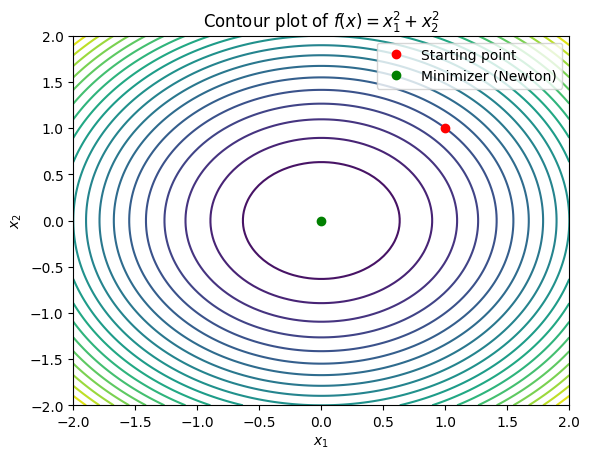

In [22]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define a sample function f(x) = x1^2 + x2^2 (for illustration)
def f(x):
    return np.sum(x**2, axis=1)  # Apply the sum of squares for each row

# Compute the gradient (first derivative) of f(x)
def gradient(x):
    return 2 * x

# Compute the Hessian (second derivatives) of f(x)
def hessian(x):
    return 2 * np.eye(len(x))

# Newton's method for optimization
def newton_method(f, grad, hess, x0, tol=1e-6, max_iter=100):
    x = x0
    for i in range(max_iter):
        g = grad(x)
        H = hess(x)
        # Newton's update: x_{new} = x - H_inv * grad
        H_inv = np.linalg.inv(H)
        x_new = x - H_inv @ g
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    return x

# Use Newton's method to find the minimum
x0 = np.array([1.0, 1.0])  # Starting point
x_min_newton = newton_method(f, gradient, hessian, x0)
print("Minimum found using Newton's method:", x_min_newton)

# Function for second-order Taylor approximation
def taylor_approximation(x, x0, grad, hess):
    g = grad(x0)
    H = hess(x0)
    # Perform dot products for Taylor expansion
    diff = x - x0
    return f(np.array([x0])) + np.dot(diff, g) + 0.5 * np.dot(diff.T, np.dot(H, diff))

# Approximate the function near a point using the second-order Taylor series
x0 = np.array([1.0, 1.0])  # Reference point
x = np.array([0.5, 0.5])   # New point
taylor_approx = taylor_approximation(x, x0, gradient, hessian)
print("Second-order Taylor approximation at x:", taylor_approx)

# Visualize the function and its contours
x1_vals = np.linspace(-2, 2, 100)
x2_vals = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Evaluate the function on the mesh grid
Z = f(np.vstack([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

plt.contour(X1, X2, Z, 20)
plt.plot(x0[0], x0[1], 'ro', label='Starting point')
plt.plot(x_min_newton[0], x_min_newton[1], 'go', label='Minimizer (Newton)')
plt.legend()
plt.title('Contour plot of $f(x) = x_1^2 + x_2^2$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()


### 4.4 Constrained Optimization

Constrained optimization seeks to find the maximum or minimum of a function $f(x)$ subject to constraints. Points $x$ that satisfy the constraints are called feasible points.

Commonly, a norm constraint (e.g., $||x|| \leq 1$) is imposed. One approach is to use gradient descent, project results back into the feasible set, or project the gradient into the tangent space for efficiency. Another method involves transforming the constrained problem into an unconstrained one, such as minimizing $f(x)$ subject to $x$ having unit L2 norm by parameterizing $x$ in terms of $\theta$.

The **Karush-Kuhn-Tucker (KKT)** conditions offer a general solution to constrained optimization. The generalized Lagrangian function is introduced:

$$
L(x, \lambda, \alpha) = f(x) + \sum_{i} \lambda_i g_i(x) + \sum_{j} \alpha_j h_j(x)
$$

where $g_i(x) = 0$ represents equality constraints and $h_j(x) \leq 0$ represents inequality constraints. The KKT multipliers $\lambda_i$ and $\alpha_j$ correspond to these constraints.

The KKT conditions ensure that the optimal solution satisfies:
- The gradient of the Lagrangian is zero.
- All constraints on both $x$ and the KKT multipliers are satisfied.
- Inequality constraints exhibit **complementary slackness**, meaning $\alpha_j h_j(x) = 0$.

These conditions are necessary but not always sufficient for optimality. For further details, refer to Nocedal and Wright (2006).


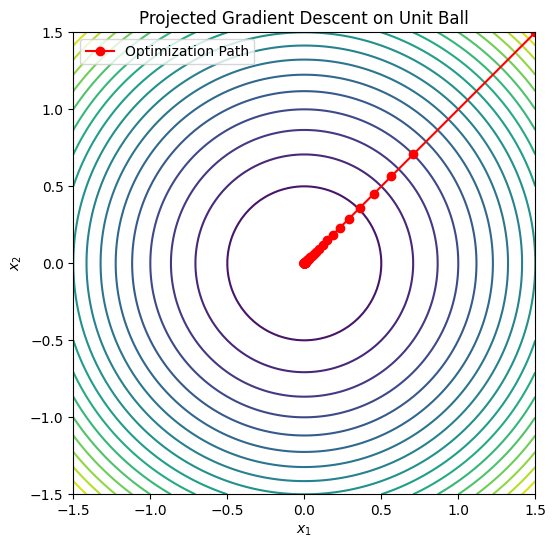

Minimum found: [1.80050244e-10 1.80050244e-10]


In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define a sample function to minimize
def f(x):
    return x[0]**2 + x[1]**2  # Example: simple quadratic function

# Gradient of the function
def gradient_f(x):
    return np.array([2*x[0], 2*x[1]])

# Project onto the unit ball (norm constraint)
def project_onto_unit_ball(x):
    norm = np.linalg.norm(x)
    if norm > 1:
        return x / norm  # Project onto the unit ball
    return x  # No projection needed if already inside

# Gradient Descent with Projection (Projected Gradient Descent)
def projected_gradient_descent(f, grad_f, x0, learning_rate=0.1, num_iterations=100):
    x = x0
    path = [x]
    for _ in range(num_iterations):
        grad = grad_f(x)
        x = x - learning_rate * grad  # Take gradient step
        x = project_onto_unit_ball(x)  # Project onto constraint set (unit ball)
        path.append(x)
    return np.array(path)

# Initial guess for x
x0 = np.array([1.5, 1.5])  # Initial point outside the unit ball
path = projected_gradient_descent(f, gradient_f, x0)

# Plotting the path of optimization on the unit ball
x_vals = np.linspace(-1.5, 1.5, 100)
y_vals = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = X**2 + Y**2  # The function to minimize (f(x) = x1^2 + x2^2)

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=20)
plt.plot(path[:, 0], path[:, 1], marker='o', color='r', label='Optimization Path')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Projected Gradient Descent on Unit Ball")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()

# Final result after optimization
print(f"Minimum found: {path[-1]}")


### 4.5 Example: Linear Least Squares

To minimize the function:

$$ f(x) = \frac{1}{2} ||Ax - b||^2 $$

We can solve this using gradient-based optimization. The gradient is:

$$ \nabla_x f(x) = A^T(Ax - b) = A^T A x - A^T b $$

We update $x$ using gradient descent with small steps:

**Algorithm (Gradient Descent):**
1. Set step size ($\epsilon$) and tolerance ($\delta$).
2. While $$ ||A^T A x - A^T b||^2 > \delta $$, update $x$ as:
   $$ x \leftarrow x - \epsilon A^T(Ax - b) $$

Alternatively, Newton’s method provides an exact solution in one step since the function is quadratic.

For the constrained problem $x^T x \leq 1$, we introduce the Lagrangian:

$$ L(x, \lambda) = f(x) + \lambda (x^T x - 1) $$

The optimization problem becomes:

$$ \min_x \max_{\lambda, \lambda \geq 0} L(x, \lambda) $$

If the unconstrained solution is feasible ($x = A^+ b$), it’s the optimal solution. Otherwise, we need to adjust $x$ to satisfy the constraint.

Differentiating the Lagrangian:

$$ A^T A x - A^T b + 2 \lambda x = 0 $$

The solution is:

$$ x = (A^T A + 2 \lambda I)^{-1} A^T b $$

The value of $\lambda$ adjusts until the constraint $x^T x = 1$ is satisfied, using gradient ascent on $\lambda$:

$$ \frac{\partial}{\partial \lambda} L(x, \lambda) = x^T x - 1 $$

The process of solving and adjusting $\lambda$ continues until the correct solution is found.

This concludes the mathematical foundation for machine learning algorithms.


In [24]:
import numpy as np

# Define the function and its gradient for linear least squares
def f(x, A, b):
    return 0.5 * np.linalg.norm(A @ x - b) ** 2

def grad_f(x, A, b):
    return A.T @ (A @ x - b)

# Gradient descent algorithm to minimize f(x)
def gradient_descent(A, b, x_init, epsilon=1e-6, delta=1e-6, max_iter=1000):
    x = x_init
    iter_count = 0
    while np.linalg.norm(grad_f(x, A, b)) > delta and iter_count < max_iter:
        x = x - epsilon * grad_f(x, A, b)
        iter_count += 1
    return x

# Newton's method for linear least squares (exact in one step)
def newtons_method(A, b):
    return np.linalg.inv(A.T @ A) @ A.T @ b

# Constrained linear least squares problem using Lagrange multipliers
def constrained_least_squares(A, b, max_iter=100):
    # Initial unconstrained solution
    x = np.linalg.pinv(A) @ b
    norm_x = np.linalg.norm(x)

    # If the unconstrained solution satisfies the constraint
    if norm_x <= 1:
        return x

    # Use Lagrange multiplier to enforce x.T * x = 1
    lambda_val = 0.0  # Initial guess for lambda
    iter_count = 0
    while iter_count < max_iter:
        # Solve for x given current lambda
        x_new = np.linalg.inv(A.T @ A + 2 * lambda_val * np.eye(A.shape[1])) @ A.T @ b
        # Check if the constraint is satisfied
        norm_x_new = np.linalg.norm(x_new)

        if np.abs(norm_x_new - 1) < 1e-6:
            return x_new
        else:
            # Adjust lambda based on the constraint
            if norm_x_new > 1:
                lambda_val += 0.01  # Increase lambda to reduce the norm
            else:
                lambda_val -= 0.01  # Decrease lambda to increase the norm
        iter_count += 1

    return x_new  # Return last computed value if maximum iterations reached

# Example data
np.random.seed(0)
A = np.random.randn(5, 3)
b = np.random.randn(5)

# Initial guess for x
x_init = np.zeros(3)

# Perform gradient descent with a maximum of 100 iterations
x_gd = gradient_descent(A, b, x_init, max_iter=100)
print("Solution using Gradient Descent:", x_gd)

# Perform Newton's method (exact solution for least squares)
x_newton = newtons_method(A, b)
print("Solution using Newton's Method:", x_newton)

# Perform constrained least squares with a maximum of 100 iterations
x_constrained = constrained_least_squares(A, b, max_iter=100)
print("Solution using Constrained Least Squares:", x_constrained)


Solution using Gradient Descent: [ 0.00032181  0.00028947 -0.00010359]
Solution using Newton's Method: [-0.22776487  1.10638653  0.07697564]
Solution using Constrained Least Squares: [-0.15976221  0.97704032  0.03490422]
